In [ ]:
# Numpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Machine learning
import tensorflow as tf
import keras
import sklearn
import sklearn.preprocessing, sklearn.base, sklearn.utils, sklearn.metrics

# Various Python tricks and libraries
import requests
import time
import functools
import operator
import collections
from tqdm import tqdm_notebook

# My own libraries
import function_zoo

## Data Preparation

In [152]:
def r2_score(ytrue, ypred): # sklearn.metrics.r2_score in tensorflow. 1 output only. 

    ytrue_mean = tf.reduce_mean(ytrue, name="ytrue_mean")
    r2_score = tf.subtract(1., tf.truediv(tf.reduce_mean((ytrue - ypred) ** 2), tf.reduce_mean((ytrue - ytrue_mean) ** 2)), name="r2_score")
    return r2_score

class TqdmProgBar(keras.callbacks.Callback):
    def __init__(self, n_epochs, field='loss'):
        self.n_epochs = n_epochs
        self.field=field
    def on_train_begin(self, logs):
        self.pbar = tqdm_notebook(total=self.n_epochs)
    def on_train_end(self, logs):
        self.pbar.close()
    def on_epoch_end(self, epoch, logs):
        self.pbar.set_description("%.2f" %(logs[self.field]))
        self.pbar.update(1)

## This trains

In [ ]:
_r = np.mgrid[0.5:10:0.01].reshape(-1)
_y = np.sin(np.pi * _r) * (1 / _r**2 - 2 / _r)
plt.plot(_r, _y)

In [ ]:
_r_scaled_shaped = sklearn.preprocessing.StandardScaler().fit_transform(_r.reshape(-1,1))
_y_scaled_shaped = sklearn.preprocessing.StandardScaler().fit_transform(_y.reshape(-1,1))

G = keras.models.Sequential([
    keras.layers.Dense(units=5, activation="tanh", input_shape=(1,)),
    keras.layers.Dense(units=10, activation="tanh"),
    keras.layers.Dense(units=1, activation=None)
])
G.compile(loss='mse', optimizer=keras.optimizers.Adam(lr=0.1), metrics=[r2_score])
history = G.fit(
    x=_r_scaled_shaped, 
    y=_y_scaled_shaped, 
    epochs=10000, batch_size=1024, shuffle=True, 
    verbose=0, callbacks=[TqdmProgBar(n_epochs=10000, field='r2_score')]
)
_yhat = G.predict(x=_r_scaled_shaped).reshape(-1)
plt.plot(_r_scaled_shaped, _y_scaled_shaped, _r_scaled_shaped, _yhat)

## Too easy. What about this?

### this works

In [112]:
# Get the data
X = np.mgrid[0.1:10:0.9, 0.1:10:0.9, 0.1:10:0.9].reshape(3, -1).T
R = np.linalg.norm(X, axis=-1)
y = np.sin(np.pi * R) * (1 / R**2 - 2 / R)

HBox(children=(IntProgress(value=0, max=10000), HTML(value=u'')))

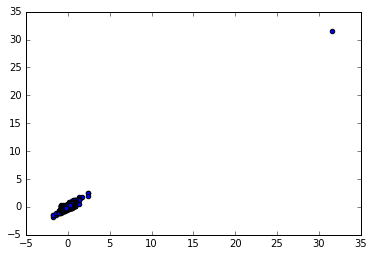

In [102]:
_X_scaled_shaped = sklearn.preprocessing.StandardScaler().fit_transform(X)
_y_scaled_shaped = sklearn.preprocessing.StandardScaler().fit_transform(y.reshape(-1,1))

G = keras.models.Sequential([
    keras.layers.Dense(units=25, activation="tanh", input_shape=(3,)),
    keras.layers.Dense(units=50, activation="tanh"),
    keras.layers.Dense(units=1, activation=None)
])
G.compile(loss='mse', optimizer=keras.optimizers.Adam(lr=0.05), metrics=[r2_score])
history = G.fit(
    x=_X_scaled_shaped, 
    y=_y_scaled_shaped, 
    epochs=10000, batch_size=2048, shuffle=True, 
    verbose=0, callbacks=[TqdmProgBar(n_epochs=10000, field='r2_score')]
)
_yhat = G.predict(x=_X_scaled_shaped)
plt.scatter(_y_scaled_shaped, _yhat)

In [113]:
_X_scaled_shaped = sklearn.preprocessing.StandardScaler().fit_transform(X)
_y_scaled_shaped = sklearn.preprocessing.StandardScaler().fit_transform(y.reshape(-1,1))

In [109]:
# Get the data
X = np.mgrid[-10:10:0.9, -10:10:0.9, -10:10:0.9].reshape(3, -1).T
R = np.linalg.norm(X, axis=-1)
y = np.sin(np.pi * R) * (1 / R**2 - 2 / R)

HBox(children=(IntProgress(value=0, max=10000), HTML(value=u'')))

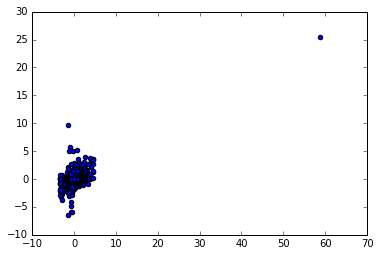

In [110]:
_X_scaled_shaped = sklearn.preprocessing.StandardScaler().fit_transform(X)
_y_scaled_shaped = sklearn.preprocessing.StandardScaler().fit_transform(y.reshape(-1,1))

G = keras.models.Sequential([
    keras.layers.Dense(units=25, activation="tanh", input_shape=(3,)),
    keras.layers.Dense(units=50, activation="tanh"),
    keras.layers.Dense(units=1, activation=None)
])
G.compile(loss='mse', optimizer=keras.optimizers.Adam(lr=0.05), metrics=[r2_score])
history = G.fit(
    x=_X_scaled_shaped, 
    y=_y_scaled_shaped, 
    epochs=10000, batch_size=2048, shuffle=True, 
    verbose=0, callbacks=[TqdmProgBar(n_epochs=10000, field='r2_score')]
)
_yhat = G.predict(x=_X_scaled_shaped)
plt.scatter(_y_scaled_shaped, _yhat)

In [120]:
def multiply_features(X):
    parameters = {
        'cos(nx+p)': {
            'n': [1, 2, 3, 4],
            'p': [0, 0.25, 0.5, 0.75]
        },
        '(x+p)^n': {
            'n': [0.5, 2, 3],
            'p': [-0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75]
        },
        '|x+p|': {
            'p': [-0.5, 0, 0.5]
        },
        '|x+p|^-1': {
            'p': [-0.5, 0, 0.5]
        },
        'e^-x': {},
        'e^-nx2': {
            'n': [0.01, 0.1, 0.5, 1]
        },
        'r': {}
    }
    
    same_shape_array = [X]
    
    for n in parameters['cos(nx+p)']['n']:
        for p in parameters['cos(nx+p)']['p']:
            same_shape_array.append(np.cos(n * X + p))
    
    for n in parameters['(x+p)^n']['n']:
        for p in parameters['(x+p)^n']['p']:
            same_shape_array.append((X + p) ** n)
            
    for p in parameters['|x+p|']['p']:
        same_shape_array.append(np.abs(X + p))
        
    for p in parameters['|x+p|^-1']['p']:
        same_shape_array.append(np.minimum(10 / np.abs(X + p), 1))
        
    same_shape_array.append(np.exp(-X))
    
    for n in parameters['e^-nx2']['n']:
        same_shape_array.append(np.exp(-n * X**2))
        
    same_shape_array.append(np.linalg.norm(X, axis=-1, keepdims=True))
    
    multiplied_features = np.concatenate(same_shape_array, axis=-1)
    return multiplied_features

In [ ]:
_X_multiplied = multiply_features(_X_scaled_shaped)
_X_multiplied[np.isnan(_X_multiplied)] = 0

In [139]:
pca = sklearn.decomposition.PCA(20)
_X_final = pca.fit_transform(_X_multiplied)

HBox(children=(IntProgress(value=0, max=10000), HTML(value=u'')))

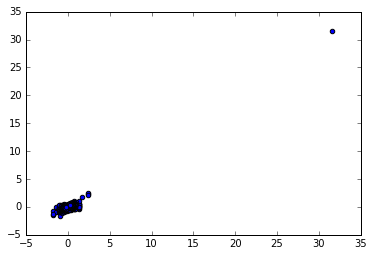

In [149]:
G = keras.models.Sequential([
    keras.layers.Dense(units=10, activation="relu", input_shape=(20,)),
    keras.layers.Dense(units=25, activation="relu"),
    keras.layers.Dense(units=1, activation=None)
])
G.compile(loss='mse', optimizer=keras.optimizers.Adam(lr=0.0005), metrics=[r2_score])
history = G.fit(
    x=_X_final, 
    y=_y_scaled_shaped, 
    epochs=10000, batch_size=32, shuffle=True, 
    verbose=0, callbacks=[TqdmProgBar(n_epochs=10000, field='r2_score')]
)
_yhat = G.predict(x=_X_final)
plt.scatter(_y_scaled_shaped, _yhat)

### this ... doesn't

In [393]:
import scipy.stats

In [394]:
# Get the data
X = np.mgrid[-10:10:0.5, -10:10:0.5, -10:10:0.5].reshape(3, -1).T
R = np.linalg.norm(X, axis=-1)
y = np.sin(np.pi * R) * (1 / R**2 - 2 / R)

df = pd.DataFrame(X, columns=['x1','x2','x3'])
df['y'] = y

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in divide
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in subtract
  after removing the cwd from sys.path.


In [395]:
# Drop NA
df = df.dropna(axis=0)

# Standard Scaling
df[:] = sklearn.preprocessing.scale(df[:])

In [396]:
# Outlier removal
df = df[(np.abs(scipy.stats.zscore(df))<3).all(axis=1)]

# Scale again to tidy up
df[:] = sklearn.preprocessing.scale(df.copy())

In [ ]:
# Neural network
G = keras.models.Sequential([
    keras.layers.Dense(units=40, activation="tanh", input_shape=(3,)),
    keras.layers.Dense(units=75, activation="tanh"),
    keras.layers.Dense(units=35, activation="tanh"),
    keras.layers.Dense(units=1, activation=None)
])
G.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.99, nesterov=True), metrics=[r2_score])
history = G.fit(
    x=df.drop('y',axis=1), 
    y=df.loc[:,['y']], 
    epochs=50000, batch_size=df.shape[0], shuffle=True, 
    verbose=0, callbacks=[TqdmProgBar(n_epochs=50000, field='r2_score')]
)

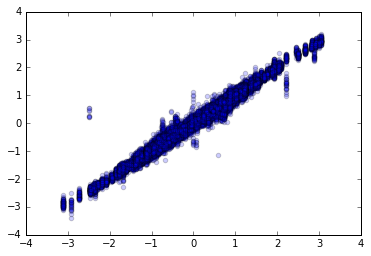

In [389]:
plt.scatter(df.loc[:,['y']], G.predict(x=df.drop('y',axis=1)), alpha=0.2)

In [392]:
keras.models.save_model(G, 'tanh_8000sample_40x75x35_FINALGOOD.h5py')

In [384]:
df.shape

(63635, 4)

In [385]:
keras.models.h5py = reload(h5py)

### codebase

In [302]:
# Feature Expansion
df['r'] = np.linalg.norm(df[['x1','x2','x3']], axis=-1)

for col in ['x1', 'x2', 'x3', 'r']:
    x = df[col]
    
    for n in [1, 2, 3, 4]:
        for p in [0, 0.25, 0.5, 0.75]:
            df["cos[{}{}+{}]".format(n,col,p)] = np.cos(n * x + p)
            
    for n in [2, 3]:
        for p in [-0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75]:
            df["({}+{})^{}".format(n,col,p)] = (x + p) ** n
            
    for p in [-0.5, 0, 0.5]:
        df["|{}+{}|".format(col,p)] = np.abs(x + p)
        df["|{}+{}|^-1".format(col,p)] = np.minimum(1. / np.abs(x + p) / 5., 1)
        
    df["e^-{}".format(col)] = np.exp(-x)
        
    for n in [0.01, 0.1, 0.5 ,1]:
        df["e^-{}{}^2".format(n,col)] = np.exp(-n * x**2)

In [296]:
# PCA analysis
pca = sklearn.decomposition.PCA(20)
df_pca = pd.DataFrame(pca.fit_transform(df), columns=['PCA_X{}'.format(i) for i in range(20)])
df_pca['y'] = df['y']
df_pca = df_pca.dropna()